Below is my written description of three observable trends based on the data:

1.  The average fare per city is considerably lower in urban cities than in rural cities.
2.  However, the number of rides per city is considerably higher in urban cities than in rural cities.
3.  The percentage of rides and fares in rural areas is below half the percentage of drivers in rural areas.  Therefore, hiring a driver in rural areas will not be as financially lucrative as hiring a driver in an urban area.
4.  While suburban drivers are 30% of all drivers and generate 30% of the fares, they generate only 26% of the rides.  So the dollar per ride will be higher for suburban drivers than urban drivers.  Therefore, hiring a suburban driver will be the most financially lucrative.

In [213]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
# Create a path to the csv and read it into a Pandas DataFrame

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_data_complete = pd.merge(city_data_df, ride_data_df, how="left", on=["city"])

# Display the data table for preview
city_data_complete.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [214]:
city_data_complete.head()
neworder = ["city","date","fare","ride_id","driver_count","type"]
#city_data_complete=city_data_complete.reindex(columns=neworder)
city_data_complete.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [215]:

# Obtain the x and y coordinates for each of the three city types

grouped_city_data_complete = city_data_complete.groupby(["type","city"]).sum()
grouped_city_data_complete = grouped_city_data_complete.drop(columns=["driver_count","ride_id"])
grouped_city_data_complete2 = city_data_df.groupby(["type","city"]).max()
grouped_city_data_complete3 = city_data_complete.groupby(["type","city"]).count()
grouped_city_data_complete3 = grouped_city_data_complete3.drop(columns=["date","fare","driver_count"])
grouped_city_data_merge = grouped_city_data_complete.merge(grouped_city_data_complete2, on=["type","city"], how="inner")
grouped_city_data_merge2 = grouped_city_data_merge.merge(grouped_city_data_complete3, on=["type","city"], how="inner").rename(columns={"ride_id": "total_rides"})
grouped_city_data_merge2["avg_fare_per_city"] = grouped_city_data_merge2["fare"]/grouped_city_data_merge2["total_rides"]
grouped_city_data_merge2 = grouped_city_data_merge2.drop(columns=["fare"])

# Make a variable for each type of city
type = "Rural"
type2 = "Suburban"
type3 = "Urban"
# Collect the data by type in group_city_data_merge2 above
rural_type = grouped_city_data_merge2.loc[type]
suburban_type = grouped_city_data_merge2.loc[type2]
urban_type = grouped_city_data_merge2.loc[type3]


grouped_city_data_merge2.head()

driver_count  total_rides  avg_fare_per_city
type  city                                                        
Rural Bradshawfurt               7           10          40.064000
      Garzaport                  7            3          24.123333
      Harringtonfort             4            6          33.470000
      Jessicaport                1            6          36.013333
      Lake Jamie                 4            6          34.358333

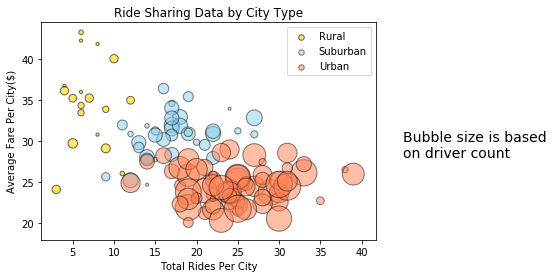

<Figure size 576x360 with 0 Axes>

In [216]:
#Create scatter plots
fig, ax = plt.subplots()


# Build the scatter plots for each city types
plt.scatter(rural_type["total_rides"], rural_type["avg_fare_per_city"], s=rural_type["driver_count"]*10, facecolors="gold", alpha=0.6, edgecolors="black", label="Rural")
plt.scatter(suburban_type["total_rides"], suburban_type["avg_fare_per_city"], s=suburban_type["driver_count"]*10, facecolors="skyblue", alpha=0.5, edgecolors="black", label="Suburban")
plt.scatter(urban_type["total_rides"], urban_type["avg_fare_per_city"], s=urban_type["driver_count"]*10, facecolors="coral", alpha=0.5, edgecolors="black", label="Urban")
# Create a legend
#plt.legend((type, type2, type3), loc='upper right')

lgnd = plt.legend((type, type2, type3), loc='upper right')

#change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate the other graph properties
#ax.set_xlim(0, 40)
#ax.set_ylim(18, 48)
plt.ylabel('Average Fare Per City($)')
plt.xlabel('Total Rides Per City')
plt.title("Ride Sharing Data by City Type")



# Incorporate a text label regarding circle size
plt.text(45, 30, "Bubble size is based", fontsize = 14)
plt.text(45, 28, "on driver count", fontsize = 14)

# Print our chart to the screen
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.show()
# Save Figure

## Total Fares by City Type

In [217]:
# Calculate Type Percentages
# % of Total Fares by City Type
grouped_ride_data = city_data_complete.groupby(["type"]).sum()
grouped_ride_data = grouped_ride_data.drop(columns=["driver_count","ride_id"])
total_ride_fares = grouped_ride_data["fare"].sum()
grouped_ride_data["pct_fares"]=grouped_ride_data["fare"]/total_ride_fares

# % of Total Drivers by City Type
grouped_city_data = city_data_df.groupby(["type"]).count()
grouped_city_data = grouped_city_data.drop(columns=["city"])
total_driver_count = grouped_city_data["driver_count"].sum()
grouped_city_data["pct_driver_count"]=grouped_city_data["driver_count"]/total_driver_count

# % of Total Rides by City Type
grouped_ride_data2 = city_data_complete.groupby(["type"]).count()
grouped_ride_data2 = grouped_ride_data2.drop(columns=["city","date","driver_count","fare"])
total_ride_count = grouped_ride_data2["ride_id"].sum()
grouped_ride_data2["pct_ride_count"]=grouped_ride_data2["ride_id"]/total_ride_count

grouped_city_data_merge = grouped_city_data.merge(grouped_ride_data, on=["type"], how="inner")
grouped_city_data_merge2 = grouped_city_data_merge.merge(grouped_ride_data2, on=["type"], how="inner")
#grouped_city_data_merge2 = grouped_city_data_merge2.drop(columns=["driver_count","fare","ride_id"])
#grouped_city_data_merge = grouped_city_data.merge(grouped_city_data_complete3, on=["type","city"], how="inner").rename(columns={"ride_id": "total_rides"})
#grouped_city_data_merge2["avg_fare_per_city"] = round(grouped_city_data_merge2["fare"]/grouped_city_data_merge2["driver_count"] * 2 / 2)
#grouped_city_data_merge2 = grouped_city_data_merge2.drop(columns=["fare"])
driver_count_list=grouped_city_data_merge2["driver_count"]
fare_list=grouped_city_data_merge2["fare"]
ride_list=grouped_city_data_merge2["ride_id"]
grouped_city_data_merge2.head()


,driver_count,pct_driver_count,fare,pct_fares,ride_id,pct_ride_count
type,,,,,,
Rural,18,0.15,4327.93,0.068115,125,0.052632
Suburban,36,0.30,19356.33,0.304639,625,0.263158
Urban,66,0.55,39854.38,0.627246,1625,0.684211


In [221]:
grouped_city_data.head()

,driver_count,pct_driver_count
type,,
Rural,18,0.15
Suburban,36,0.30
Urban,66,0.55


([<matplotlib.patches.Wedge at 0x258824d9da0>,
 [Text(-1.0620893660215651, 0.558539325906341, 'Rural'),
  Text(-0.8505386879122898, -0.6975556897943278, 'Suburban'),
  Text(0.9792721358604437, 0.5010250332341937, 'Urban')],
 [Text(-0.6195521301792464, 0.32581460677869895, '6.8%'),
  Text(-0.4639301934067035, -0.38048492170599696, '30.5%'),
  Text(0.5341484377420601, 0.2732863817641056, '62.7%')])

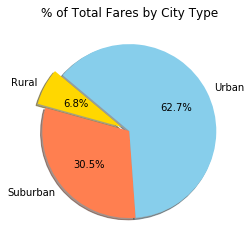

In [218]:
# Build Pie Chart # 1 
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban"]

# The values of each section of the pie chart
sizes = [fare_list]

# The colors of each section of the pie chart
colors = ["gold", "coral", "skyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
plt.title("% of Total Fares by City Type")
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Total Rides by City Type

([<matplotlib.patches.Wedge at 0x25882695278>,
 [Text(-1.0336751511106508, 0.6095208626260248, 'Rural'),
  Text(-0.9860007094711902, -0.48765008040839053, 'Suburban'),
  Text(1.0528174881480703, 0.31870885875605665, 'Urban')],
 [Text(-0.602977171481213, 0.3555538365318478, '5.3%'),
  Text(-0.5378185688024674, -0.26599095295003117, '26.3%'),
  Text(0.5742640844444019, 0.17384119568512177, '68.4%')])

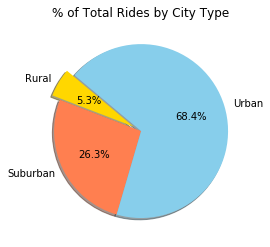

In [219]:
# Build Pie Chart # 2
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban"]

# The values of each section of the pie chart
sizes = [ride_list]

# The colors of each section of the pie chart
colors = ["gold", "coral", "skyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
plt.title("% of Total Rides by City Type")
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Total Drivers by City Type

([<matplotlib.patches.Wedge at 0x2588272c3c8>,
 [Text(-1.1692440827970272, 0.2699412433181324, 'Rural'),
  Text(-0.4120671763653916, -1.0199022708878795, 'Suburban'),
  Text(0.8301804301376048, 0.721665056252928, 'Urban')],
 [Text(-0.6820590482982657, 0.15746572526891056, '15.0%'),
  Text(-0.22476391438112267, -0.5563103295752069, '30.0%'),
  Text(0.4528256891659662, 0.39363548522886976, '55.0%')])

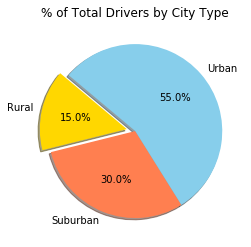

In [220]:
# Build Pie Chart # 3
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban"]

# The values of each section of the pie chart
sizes = [driver_count_list]

# The colors of each section of the pie chart
colors = ["gold", "coral", "skyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
plt.title("% of Total Drivers by City Type")
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)